## PART 1 - Machine Learning

- TASK 1.1 DATA PREPARATION

### Task 1.1 - Data Preparation
There are 99 rows and 11 dimensions in the dataset. The data is 100% dense. Features were not labelled, hence labels were provided when imported.
Task is to predict the number of containers a ship can carry. The target is known hence this is supervised learning.
From the inputs we want to get a output of the weighted sum : 𝑦 = 𝑓(𝑥𝑤)

Import necessary modules and Read data + add feature names
Call the head method to get a general overview of the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cols = ["IMO_NO.", "Vessel_Name", "Year_Built", "Gross_Tonnage", "Deadweight_Tonnage", "Length", "Beam", "Capacity_(TEU)", "Forward_Bays", "Center_Bays", "Aft_Bays"]
data = pd.read_csv('containers.csv',names=cols)
data.head()


,IMO_NO.,Vessel_Name,Year_Built,Gross_Tonnage,Deadweight_Tonnage,Length,Beam,Capacity_(TEU),Forward_Bays,Center_Bays,Aft_Bays
0,9260421,ANNA MAERSK,2003,93496,109000,352.60,42.80,8272,15,0,6
1,9461867,APL CHONGQING,2011,113735,122200,349.00,45.73,10106,15,0,5
2,9354404,BF EUPHORIA,2006,9962,11432,134.44,22.74,868,8,0,0
3,9343728,BREMEN EXPRESS,2008,93750,103567,335.06,42.87,8749,15,0,5
4,9314947,CAMELLIA,2006,28927,39200,222.15,30.04,2824,11,0,2


Explore the data
Describe the dataframe by summarize it by computing aggregations. We can do this by using the info method in Pandas. We can see that all data is non-null as expected and we have 8 numeric values, one target, and one String.

In [3]:
data.info()
data.describe()
data['IMO_NO.'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IMO_NO.             100 non-null    int64  
 1   Vessel_Name         100 non-null    object 
 2   Year_Built          100 non-null    int64  
 3   Gross_Tonnage       100 non-null    int64  
 4   Deadweight_Tonnage  100 non-null    int64  
 5   Length              100 non-null    float64
 6   Beam                100 non-null    float64
 7   Capacity_(TEU)      100 non-null    int64  
 8   Forward_Bays        100 non-null    int64  
 9   Center_Bays         100 non-null    int64  
 10  Aft_Bays            100 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 8.7+ KB


IMO_NO.
9314947    2
9260421    1
9298997    1
9454436    1
9631981    1
          ..
9619438    1
9618276    1
9444273    1
9236470    1
9795610    1
Name: count, Length: 99, dtype: int64

For each of these features, comparing the max and 75% values, we can start to see a huge difference in the Beam (Width) feature. This confirms that there may be an error with some of the tuples. 

We can also see that there is a duplicate IMO vessel listed. A further online shows that this is vessel was renamed, we will leave in this duplicate vessel.

Let us investigate further.

Extract the inputs (variables) and the targets from the dataset, this is the feature we trying to predict.

In [144]:
cols_to_drop = ['IMO_NO.','Vessel_Name','Capacity_(TEU)']
inputs = data.drop(columns=cols_to_drop).to_numpy(int) #Input features
targets = data['Capacity_(TEU)'].to_numpy(int) #Prediction Target


Let’s have a quick look at the distribution of the Beam feature by plotting the histograms.

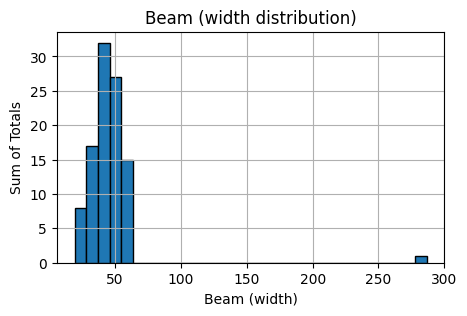

In [5]:

# for col in data.iloc[:,2:11]:
data['Beam'].hist(figsize=(5, 3), bins=30, edgecolor="black", )
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.title('Beam (width distribution)')
plt.xlabel('Beam (width)')
plt.ylabel("Sum of Totals")
plt.show()

In the above histogram we can spot one outlier which is the Beam (Width). 
We can plot a scatter plot to take a look at the ships beam vs length below.

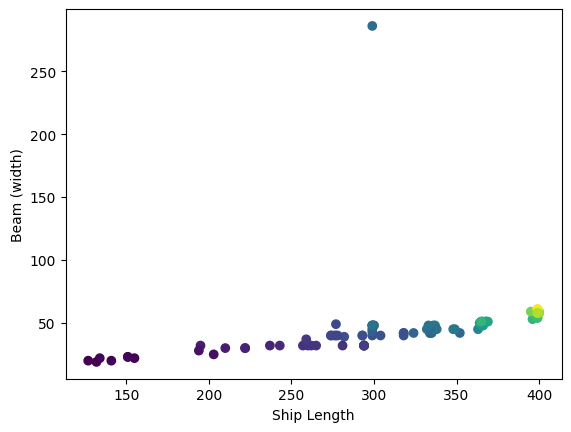

In [6]:
plt.figure()
plt.scatter(inputs[:,3], inputs[:,4], c=targets)
plt.xlabel("Ship Length")
plt.ylabel("Beam (width)")
plt.show()

Here we can see one ship has a length and width of 300x290 meters.  The outlier is identified as MSC Albany with IMO 9619438. Correct beam should be 48meters.

We can use common sense to deduce that the as the total number of bays should be in direct proportion to the ships total capacity. Let us plot this, below we can see that there is a gradual increase in the capacity as the Total bay count increases.

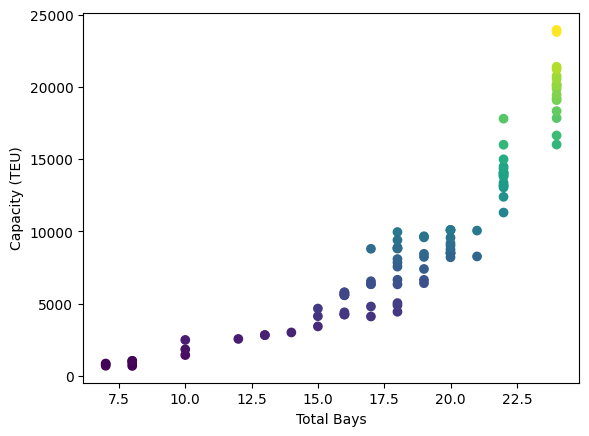

In [7]:
# Sum the total number of bays
totalbays = ['Forward_Bays', 'Center_Bays','Aft_Bays']
totalbays = data[totalbays].sum(axis=1)
plt.scatter(totalbays, targets, c=targets)
plt.xlabel("Total Bays")
plt.ylabel("Capacity (TEU)")
plt.show()

Now let us normalize the data to ensure that the values share a common scale, this will reduce complexity and optimize the data for machine learning.
In this case we will use the StandardScaler for Standardization.

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# inputs
scaledInputs = scaler.fit_transform(inputs)
# scaledInputs[0]
scaledTargets = scaler.fit_transform(targets.reshape(-1,1))
# plt.scatter(scaledInputs[:, 0], scaledInputs[:, 1])


- TASK 1.2 REGRESSION

<Axes: xlabel='Deadweight_Tonnage', ylabel='Capacity_(TEU)'>

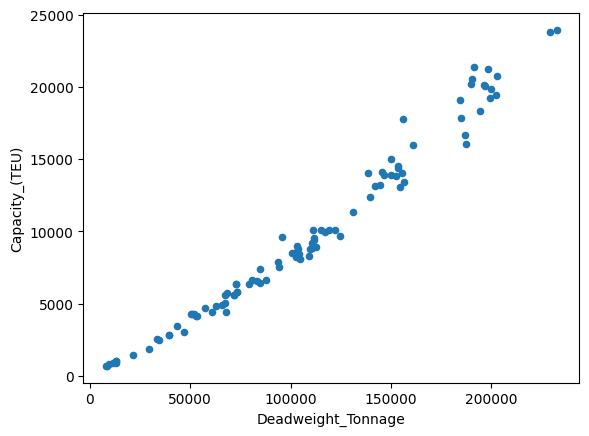

In [9]:
#Random Forest
# data.plot(kind='scatter', x='Dearweight_Tonnage', y='Capacity_(TEU)')

data.plot(kind = 'scatter', x = 'Deadweight_Tonnage', y = 'Capacity_(TEU)')


Above we can see there is a postive linear relationship between the feature 'Deadweight_Tonnage' and the target prediction (Capacity). This means that as teh ships tonnage increase, there is a postive increase in capacity.

Split the data (training & testing)
75% Training data (Default)
25% Testing data (Default)

In [10]:
from sklearn.model_selection import train_test_split
X = scaledInputs
y = targets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
X_test

array([[0.82051282, 0.47254113, 0.47720888, 0.76556777, 0.10861423,
        0.81818182, 0.        , 0.5       ],
       [0.82051282, 0.80200778, 0.7850392 , 0.996337  , 0.14606742,
        0.27272727, 0.78571429, 0.4       ],
       [0.61538462, 0.01667699, 0.01537215, 0.02564103, 0.01123596,
        0.18181818, 0.        , 0.        ],
       [0.69230769, 0.21800814, 0.25821473, 0.61172161, 0.04868914,
        0.72727273, 0.        , 0.4       ],
       [0.74358974, 0.63975765, 0.65664858, 0.87545788, 0.11985019,
        0.18181818, 0.71428571, 0.4       ],
       [1.        , 0.64484345, 0.68089767, 0.87179487, 0.11985019,
        0.        , 0.85714286, 0.4       ],
       [0.71794872, 0.37528746, 0.42227782, 0.75824176, 0.08614232,
        0.81818182, 0.        , 0.5       ],
       [0.76923077, 0.74806298, 0.79975248, 0.98534799, 0.12734082,
        0.27272727, 0.71428571, 0.5       ],
       [0.71794872, 0.43982399, 0.39034043, 0.75091575, 0.09737828,
        0.72727273, 0.      

Random Forrest

In [68]:
#Regression model random forest
from sklearn.ensemble import RandomForestRegressor
#Make an instance of the model
rfc = RandomForestRegressor(n_estimators=100, random_state=0)
# Train the model on the data (X = Features, Y = Capacity (target))
rfc.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Predict the labels of new data (new containers in the test split)

In [95]:
random_forest_pred = rfc.predict(X_test)

Measure the model performance

In [129]:
score = rfc.score(X_test, y_test)
score

0.990378844858559

In [121]:
from sklearn.metrics import mean_absolute_error
# Calculate the mean absolute error (MAE) and mean absolute percentage error (MAPE) for each observation
mae = [abs(y_test[i] - random_forrest_pred[i]) for i in range(len(y_test))]
mape = [100 * abs(y_test[i] - random_forest_pred[i]) / y_test[i] for i in range(len(y_test))]
# Define a margin of error as a percentage of the target variable range
# Create a table with the true and predicted values, difference, error percentage, MAE, and MAPE
results = pd.DataFrame({'True': y_test, 'Predicted': random_forest_pred, 'Difference': y_test - random_forrest_pred, 'Error %': np.round((y_test - random_forrest_pred) / y_test *100,2), 'MAE': mae, 'MAPE %': mape,})
results



,True,Predicted,Difference,Error %,MAE,MAPE %
0,10100,9866.48,233.52,2.31,233.52,2.312079
1,19100,19007.81,92.19,0.48,92.19,0.482670
2,868,861.56,6.44,0.74,6.44,0.741935
3,4888,5083.05,-195.05,-3.99,195.05,3.990385
4,14074,13582.54,491.46,3.49,491.46,3.491971
5,16010,14386.02,1623.98,10.14,1623.98,10.143535
6,8500,8430.03,69.97,0.82,69.97,0.823176
7,16022,17040.23,-1018.23,-6.36,1018.23,6.355199
8,9592,8415.68,1176.32,12.26,1176.32,12.263553
9,20776,20866.64,-90.64,-0.44,90.64,0.436273


Plot the actual vs predicted for Random Forest

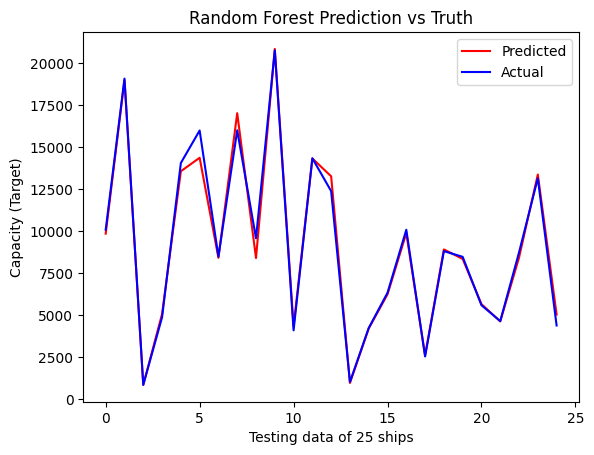

In [99]:
# plot the predicted test results as a red line
plt.plot(random_forest_pred, "r-", label="Predicted")

# plot the actual test results as a blue line
plt.plot( y_test, "b-", label="Actual")

# add a legend and axis labels
plt.legend()
plt.title("Random Forest Prediction vs Truth")
plt.xlabel("Testing data of 25 ships")
plt.ylabel("Capacity (Target)")
plt.show()

Show a datatable comparing the differences.


Neural Network - Using MLPRegressor

C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.08016508660708005
479.2014173361848
Actual Value  10100
Predicted Value  10528.134792979816


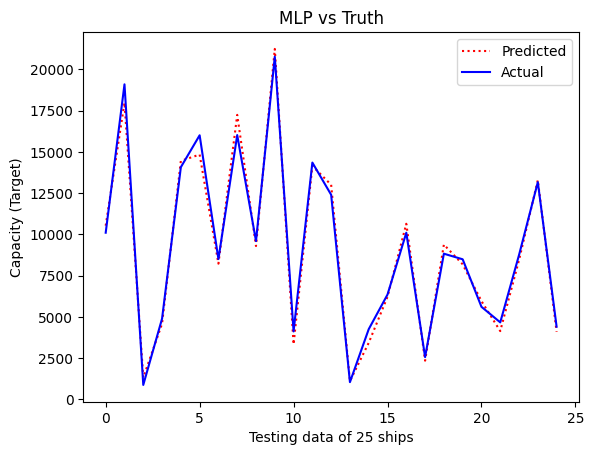

In [110]:
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
# regressor = MLPRegressor()
regressor = MLPRegressor(hidden_layer_sizes=(100,), activation="relu", solver="adam", max_iter=40000, random_state=0)
regressor.fit(X_train, y_train)
# print(y_test)
mlp_pred = regressor.predict(X_test)
# print(outputs)
print(mean_absolute_percentage_error(y_test,mlp_pred))
print(mean_absolute_error(y_test,mlp_pred))
print("Actual Value ", y_test[0])
print("Predicted Value ", mlp_pred[0])
# print(np.mean(abs(outputs-y_test)))
# mse = mean_squared_error(y_test, outputs)
# print(mse)

plt.plot(mlp_pred, "r:", label="Predicted")

# plot the actual test results as a blue line
plt.plot( y_test, "b-", label="Actual")

# add a legend and axis labels
plt.legend()
plt.title("MLP vs Truth")
plt.xlabel("Testing data of 25 ships")
plt.ylabel("Capacity (Target)")
plt.show()

Support Vector Machine


Actual Value  868
Predicted Value  -0.07415475014912282


C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


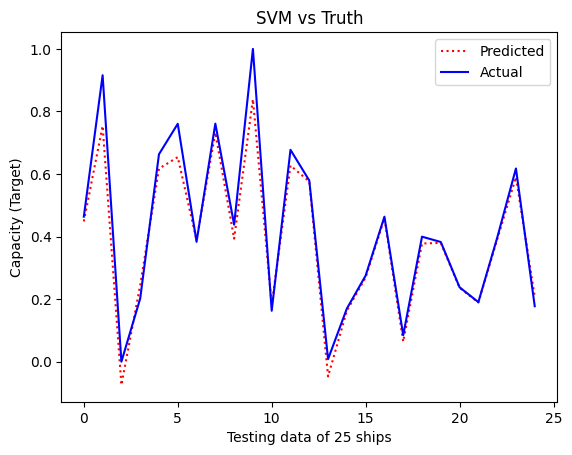

In [153]:
from sklearn.svm import SVR
svm = SVR(kernel='linear')
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler.fit_transform(y_test.reshape(-1,1))
# regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm.fit(X_train, y_train_scaled)
svm_pred = svm.predict(X_test)
print("Actual Value ", y_test[2])
print("Predicted Value ", svm_pred[2])

plt.plot(svm_pred, "r:", label="Predicted")

# plot the actual test results as a blue line
plt.plot( y_test_scaled, "b-", label="Actual")

# add a legend and axis labels
plt.legend()
plt.title("SVM vs Truth")
plt.xlabel("Testing data of 25 ships")
plt.ylabel("Capacity (Target)")
plt.show()



Produce a list of top ten predicted containers by capacity for each of the 3 implementations.

In [155]:
df = data
df
svm_pred_unscaled = scaler.inverse_transform(svm_pred.reshape(-1, 1)) 
svm_pred_unscaled
cols = np.array(["Year_Built","Gross_Tonnage","Deadweight_Tonnage","Length","Beam","Forward_Bays","Center_Bays","Aft_Bays"])
x_test_unscaled = pd.DataFrame(X_test, columns=cols)
df_pred_unscaled['target'] = y_test
df_pred_unscaled['predicted'] = y_pred_unscaled.ravel()
# print(len(svm_pred_unscaled))
# cols = np.array(["Year_Built","Gross_Tonnage","Deadweight_Tonnage","Length","Beam","Forward_Bays","Center_Bays","Aft_Bays"])
# df = pd.DataFrame(inputs,columns=cols)
# df
# df['target'] = y_test
# df['predicted'] = y_pred

array([[ 9796.70922061],
       [15873.07080318],
       [ -608.27276597],
       [ 5727.78527959],
       [13157.35413269],
       [13889.97452921],
       [ 8616.94702681],
       [15452.30704936],
       [ 8702.64217342],
       [17569.86452118],
       [ 4485.03932622],
       [13351.45401923],
       [12343.32457784],
       [  -71.81874709],
       [ 4111.59203512],
       [ 6237.54048346],
       [ 9996.42515767],
       [ 2148.09213904],
       [ 8391.28113354],
       [ 8430.19685934],
       [ 5571.3041757 ],
       [ 4637.44784832],
       [ 8643.34012364],
       [12616.84227116],
       [ 5009.70870341]])

check the ERROS

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the MSE, RMSE, and MAE scores
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the scores
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 score: ", r2)


MSE:  28971167.347391065
RMSE:  5382.487096816031
MAE:  4349.269412754497
R2 score:  -0.008505817165157303


Produce a decision tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fig,axes = plt.subplots(nrows= 1, ncols=1, figsize=(4,4), dpi=600)
tree.plot_tree(rfc.estimators_)


Show Feature importance

In [130]:
importance = pd.DataFrame({'feature':X_train,'importance':np.round(rfc.feature_importances_,3)})


ValueError: Per-column arrays must each be 1-dimensional

Randomize the data (even though it looks like the are in no particuilar order). This is to be sure the train-test split has a even number of data from all capacities

In [ ]:
I = np.random.permutation(inputs)
I

Show a decision tree to better understand the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree




Cross-Validation

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(regressor, scaled, targets, cv=5, return_train_score=True)
training = cv_results["train_score"]
testing = cv_results["test_score"]
plt.boxplot([training, testing], labels=['Training', 'Testing'])